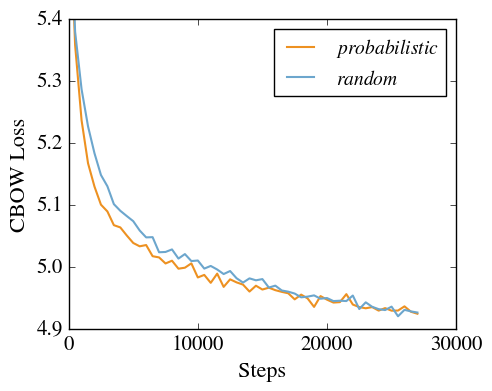

In [119]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

import os.path
import time
import collections
import csv
import pandas

colnames = ['Wall time', 'Step', 'Value']

file_base = "./nlp-intrinsic-results/run_baseline,tag_test-loss.csv"
file_initial = "./nlp-intrinsic-results/run_initial,tag_test-loss.csv"
file_prob = "./nlp-intrinsic-results/run_adapt-prob,tag_test-loss.csv"
file_random = "./nlp-intrinsic-results/run_adapt-random,tag_test-loss.csv"

df_base = pandas.read_csv(file_base, names=colnames)
df_initial = pandas.read_csv(file_initial, names=colnames)
df_prob = pandas.read_csv(file_prob, names=colnames)
df_random = pandas.read_csv(file_random, names=colnames)

dfs = [df_base, df_initial, df_prob, df_random]

def strip_white(df):
    cols = df_prob.columns
    cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str, unicode)) else x)
    df.columns = cols
    
def get_lists(df):
    wall_time = [np.float(x)/60.0 for ind, x in enumerate(df.Wall_time.tolist()) if ind > 0]
    step = [np.float(x) for ind, x in enumerate(df.Step.tolist()) if ind > 0]
    value = [np.float(x) for ind, x in enumerate(df.Value.tolist()) if ind > 0]
    
    wall_time = [np.around(t - wall_time[0], 2) for t in wall_time]
    return wall_time, step, value

for df in dfs:
    strip_white(df)

base_wall, base_step, base_value = get_lists(df_base)
initial_wall, initial_step, initial_value = get_lists(df_initial)
prob_wall, prob_step, prob_value = get_lists(df_prob)
random_wall, random_step, random_value = get_lists(df_random)

def test_plot(x, y, color, legend, title):
    fig, ax1 = plt.subplots(figsize=(5, 4))
    #ax1 = fig.add_axes((0.1,0.3,1.0,1.0)) # create an Axes with some room below
    plt.title(title)
    
    for i, (step, value) in enumerate(zip(x, y)):
        ax1.plot(step, value, color[i], linewidth=1.5)
        
    plt.legend(legend, fontsize=14)
    
    ax1.set_ylabel("CBOW Loss", fontsize = 16)
    ax1.set_xlabel("Steps", fontsize = 16)
    ax1.locator_params(axis='x',nbins=4)
    #ax1.set_yscale('log')

    plt.savefig("foo.pdf")
    axes = plt.gca()
    axes.set_ylim([4.9,5.4]) #guideline 4 - 6 for base, iv
    plt.show()

cut = 55
cut1 = 200
    
x = []
y = []
colors = ['#ED9121', '#6CA6CD']
legend = [r'$baseline$', r'$IV \; trained$', r'$probabilistic$',r'$random$' ]

for i, df in enumerate(dfs):
    strip_white(df)
    _, s, v = get_lists(df)
    
    if i > 2:
        s = s[:cut]
        v = v[:cut]
    else:
        s = s[:cut]
        v = v[:cut]
        
    x.append(s)
    y.append(v)
    
#test_plot(x[:2], y[:2], color, legend[:2],'')
matplotlib.rcParams['xtick.labelsize'] = 15 
matplotlib.rcParams['ytick.labelsize'] = 15 
test_plot(x[2:], y[2:], colors, legend[2:],'')

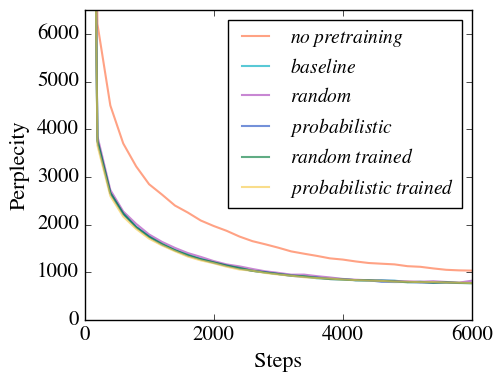

In [117]:
file_rnn_base = "./nlp-rnn-results/perplexity/run_rnn-baseline,tag_test-perplexity.csv"
file_rnn_notrain = "./nlp-rnn-results/perplexity/run_rnn-nopretrain,tag_test-perplexity.csv"
file_rnn_prob_train = "./nlp-rnn-results/perplexity/run_rnn-trained-prob,tag_test-perplexity.csv"
file_rnn_prob_notrain = "./nlp-rnn-results/perplexity/run_rnn-prob,tag_test-perplexity.csv"
file_rnn_random_train ="./nlp-rnn-results/perplexity/run_rnn-trained-random,tag_test-perplexity.csv"
file_rnn_random_notrain = "./nlp-rnn-results/perplexity/run_rnn-random,tag_test-perplexity.csv"

df_rnn_base = pandas.read_csv(file_rnn_base, names=colnames) 
df_rnn_notrain = pandas.read_csv(file_rnn_notrain, names=colnames)
df_rnn_prob_train = pandas.read_csv(file_rnn_prob_train, names=colnames)
df_rnn_prob_notrain = pandas.read_csv(file_rnn_prob_notrain, names=colnames)
df_rnn_random_train = pandas.read_csv(file_rnn_random_train, names=colnames)
df_rnn_random_notrain =pandas.read_csv(file_rnn_random_notrain, names=colnames)

dfs = [df_rnn_notrain, df_rnn_base, df_rnn_random_notrain, df_rnn_prob_notrain,df_rnn_random_train, df_rnn_prob_train]

x_rnn = []
y_rnn = []
legend_rnn = [r'$no \;pretraining$', r'$baseline$',r'$random$', r'$probabilistic$', r'$random \;trained$', r'$probabilistic \;trained$']
colors = ['#FF7043','#00ACC1','#AB47BC','#2A56C6','#0B8043','#F7CB4D', ]
for df in dfs:
    strip_white(df)
    _, s, v = get_lists(df)
    x_rnn.append(s)
    y_rnn.append(v)
    
def rnn_plot(x, y, colors, legend):
    fig, ax1 = plt.subplots(figsize=(5, 4))

    for i, (step, value) in enumerate(zip(x, y)):
        ax1.plot(step, value, linewidth=1.5, alpha = 0.65, color = colors[i])

    plt.legend(legend, fontsize=14)

    ax1.set_ylabel("Perplecity", fontsize = 16)
    ax1.set_xlabel("Steps", fontsize = 16)
    ax1.locator_params(axis='x',nbins=4)
    
    #plt.savefig("foo.pdf")
    axes = plt.gca()
    #axes.set_xlim([xmin,xmax])
    axes.set_ylim([0,6500])
    plt.show()
    
cutrnn = 0
rnn_plot(x_rnn[cutrnn:], y_rnn[cutrnn:], colors, legend_rnn[cutrnn:])